In [49]:
import pandas as pd

# Load the data (adjust the file path to where your dataset is saved)
data = pd.read_csv('C:/Users/P3Fusion/Downloads/dft-road-casualty-statistics-collision-2023.csv',low_memory=False)

# Display the first few rows to understand the structure
print(data.head())

# Clean the dataset (e.g., handle missing values, convert time to datetime)
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['time'] = pd.to_datetime(data['time'], format='%H:%M', errors='coerce')

# Check for missing values in the critical columns
print(data[['weather_conditions', 'road_surface_conditions', 'time']].isnull().sum())


  accident_index  accident_year accident_reference  location_easting_osgr  \
0  2023010419171           2023          010419171               525060.0   
1  2023010419183           2023          010419183               535463.0   
2  2023010419189           2023          010419189               508702.0   
3  2023010419191           2023          010419191               520341.0   
4  2023010419192           2023          010419192               527255.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                170416.0  -0.202878  51.418974             1   
1                198745.0  -0.042464  51.671155             1   
2                177696.0  -0.435789  51.487777             1   
3                190175.0  -0.263972  51.597575             1   
4                176963.0  -0.168976  51.477324             1   

   accident_severity  number_of_vehicles  ...  light_conditions  \
0                  3                   1  ...                 4   
1           

In [91]:
data.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location',
       'enhanced_severity_collision', 'hour', 'time_of_day'],
      dtype='object')

In [51]:
# Extract the hour from the 'time' column
data['hour'] = data['time'].dt.hour

# Categorize into parts of the day
data['time_of_day'] = pd.cut(data['hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)

# Display unique weather conditions and road surface types for reference
print(data['weather_conditions'].unique())
print(data['road_surface_conditions'].unique())


[8 1 9 2 5 4 3 7 6]
[ 2  1  9  4  3  5 -1]


In [53]:
# Group by weather and road surface conditions to find accident counts
weather_road_group = data.groupby(['weather_conditions', 'road_surface_conditions']).size().reset_index(name='accident_count')

# Group by time of day and weather to see accident frequency
time_weather_group = data.groupby(['time_of_day', 'weather_conditions']).size().reset_index(name='accident_count')

print(weather_road_group.head())
print(time_weather_group.head())

   weather_conditions  road_surface_conditions  accident_count
0                   1                       -1             694
1                   1                        1           68848
2                   1                        2           11367
3                   1                        3              21
4                   1                        4             900
  time_of_day  weather_conditions  accident_count
0       Night                   1            4455
1       Night                   2            1011
2       Night                   3              41
3       Night                   4              74
4       Night                   5             104


C:\Users\P3Fusion\AppData\Local\Temp\ipykernel_16880\3907399838.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_weather_group = data.groupby(['time_of_day', 'weather_conditions']).size().reset_index(name='accident_count')


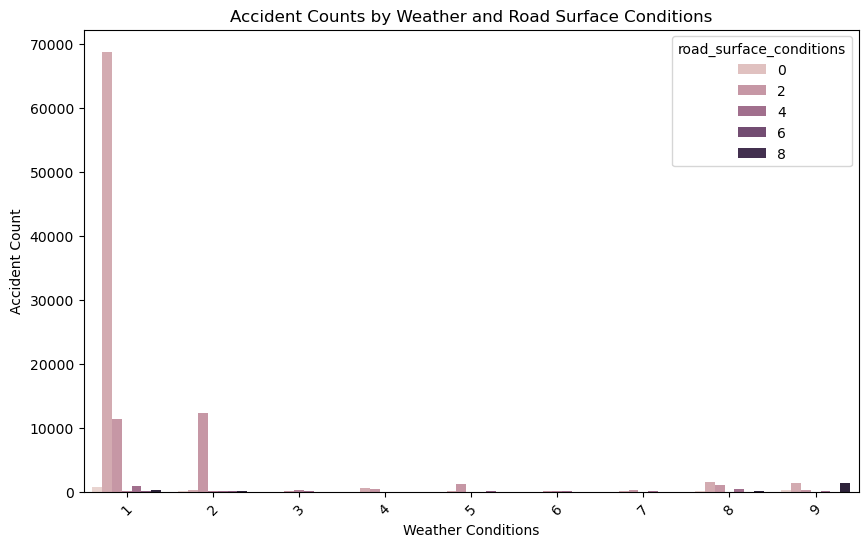

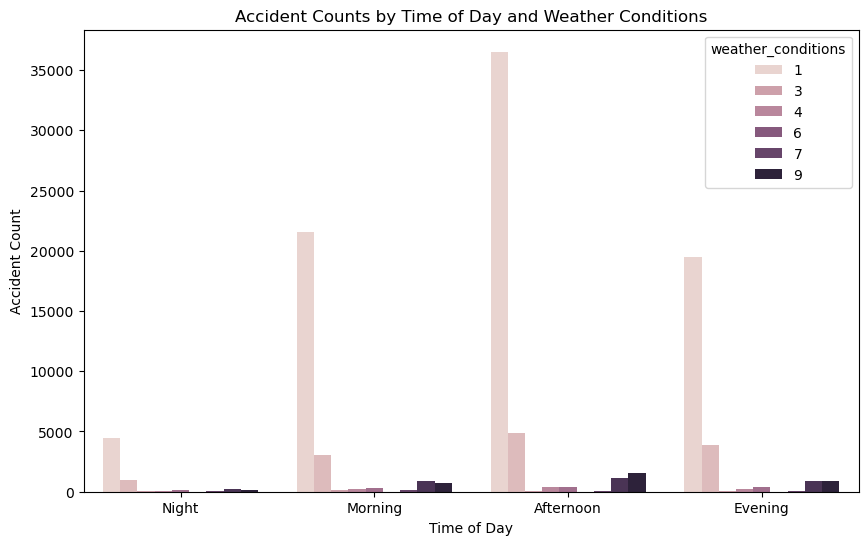

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot accident counts by weather and road surface conditions
plt.figure(figsize=(10, 6))
sns.barplot(x='weather_conditions', y='accident_count', hue='road_surface_conditions', data=weather_road_group)
plt.title('Accident Counts by Weather and Road Surface Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.show()

# Plot accident counts by time of day and weather
plt.figure(figsize=(10, 6))
sns.barplot(x='time_of_day', y='accident_count', hue='weather_conditions', data=time_weather_group)
plt.title('Accident Counts by Time of Day and Weather Conditions')
plt.xlabel('Time of Day')
plt.ylabel('Accident Count')
plt.show()

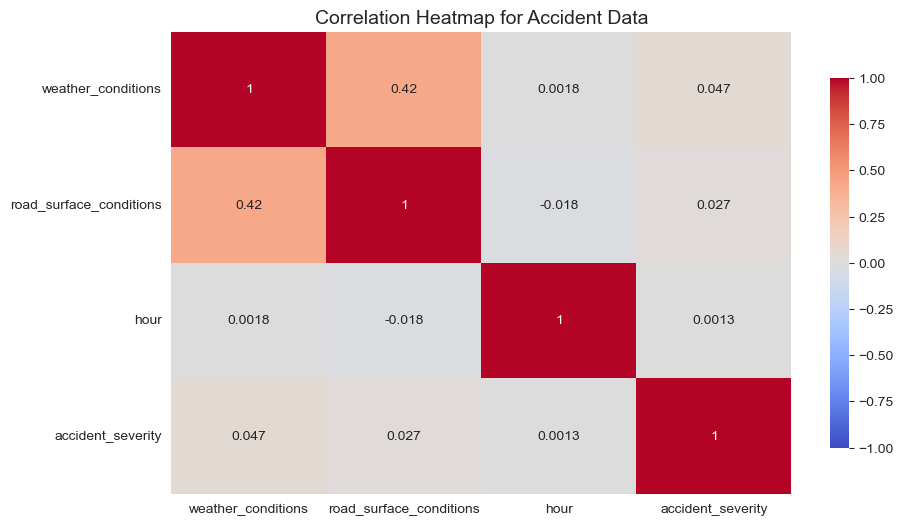

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert categorical columns to numeric for correlation if needed
# Example: If weather_conditions and road_surface_conditions are categorical
data_encoded = data.copy()
data_encoded['weather_conditions'] = data_encoded['weather_conditions'].astype('category').cat.codes
data_encoded['road_surface_conditions'] = data_encoded['road_surface_conditions'].astype('category').cat.codes

# Select only numerical columns for correlation analysis
correlation_columns = ['weather_conditions', 'road_surface_conditions', 'hour', 'accident_severity']
df_num = data_encoded[correlation_columns]

# Plot the heatmap with correlation matrix and reduced plot size
plt.figure(figsize=(10, 6))  # Adjust the figure size for a smaller plot
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={'shrink': 0.8}, annot_kws={'size': 10})
plt.title('Correlation Heatmap for Accident Data', fontsize=14)  # Adjust font size
plt.show()

###### import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create a count plot for weather condition vs accident severity
sns.countplot(data=data, x='weather_conditions', hue='accident_severity', palette='viridis')

# Add titles and labels
plt.title('Accident Severity by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Accident Severity')
plt.show()

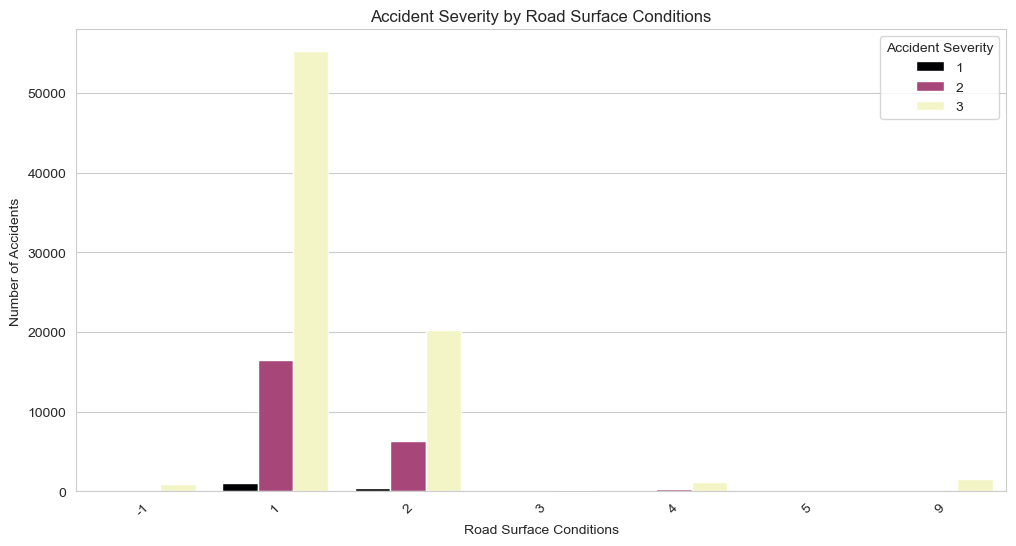

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create a count plot for road condition vs accident severity
sns.countplot(data=data, x='road_surface_conditions', hue='accident_severity', palette='magma')

# Add titles and labels
plt.title('Accident Severity by Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Accident Severity')
plt.show()

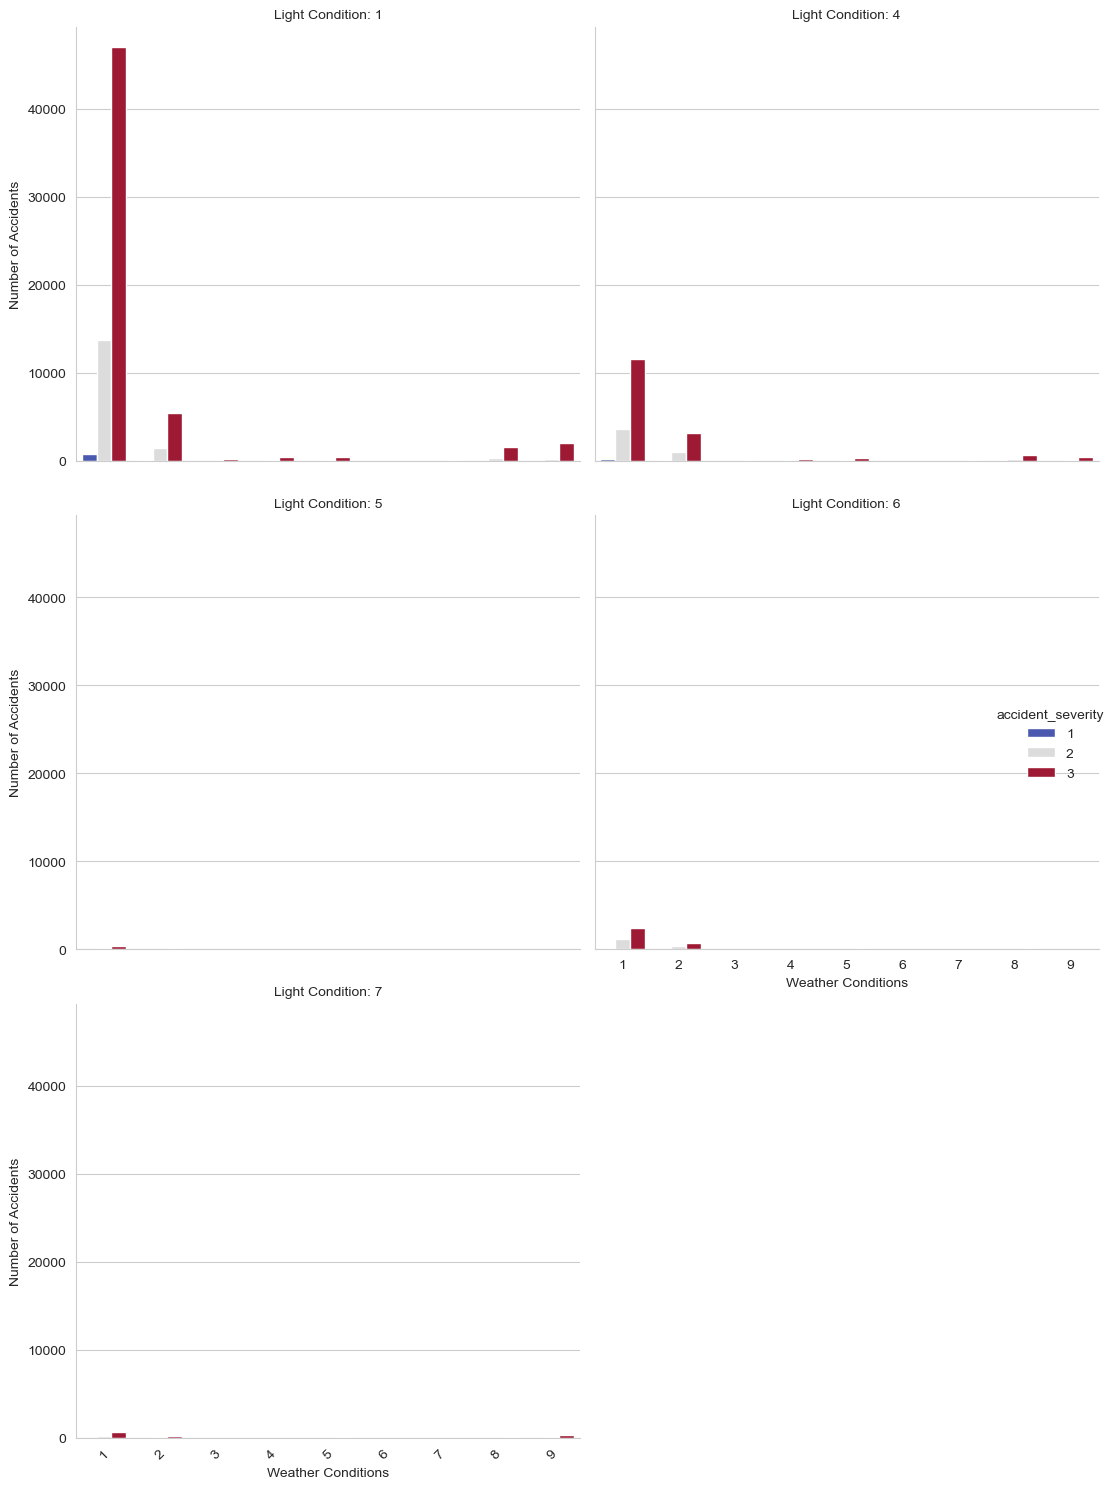

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use Seaborn's facet grid for plotting both light and weather conditions
g = sns.catplot(
    data=data,
    x='weather_conditions',
    hue='accident_severity',
    col='light_conditions',
    kind='count',
    palette='coolwarm',
    col_wrap=2  # Wrap the plots into 2 columns
)

# Add titles and labels
g.set_axis_labels('Weather Conditions', 'Number of Accidents')
g.set_titles('Light Condition: {col_name}')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()